# Exploratory Data Analysis on Airbnb's Impact on London's Neighborhood 

CASA0013 Introduction to Programming 

Student ID: 20033406

Word count: 

## Load Data and Cleaning 

In [1]:
#importing necessery libraries for future analysis of the dataset
——
import geopandas as gpd
pd.set_option('display.max_columns', None) # to reveal all columns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


In [2]:
# listings retrived on Nov 6th, 2020
listing = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-11-06/data/listings.csv.gz'
list_df = pd.read_csv(listing, compression='gzip', low_memory=False)
list_df.head(3)

id                         listing_url       scrape_id last_scraped  \
0  11551  https://www.airbnb.com/rooms/11551  20201106040109   2020-11-07   
1  13913  https://www.airbnb.com/rooms/13913  20201106040109   2020-11-07   
2  15400  https://www.airbnb.com/rooms/15400  20201106040109   2020-11-07   

                                         name  \
0  Arty and Bright London Apartment in Zone 2   
1         Holiday London DB Room Let-on going   
2         Bright Chelsea  Apartment. Chelsea!   

                                         description  \
0  Unlike most rental apartments out there my fla...   
1  My bright double bedroom with a large window h...   
2  Lots of windows and light.  St Luke's Gardens ...   

                               neighborhood_overview  \
0  Not even 10 minutes by metro from Victoria Sta...   
1  Finsbury Park is a friendly melting pot commun...   
2                                     It is Chelsea.   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/b7afccf4-18e5...    43039   
1  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
2  https://a0.muscache.com/pictures/428392/462d26...    60302   

                                  host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/43039   Adriano  2009-10-03   
1  https://www.airbnb.com/users/show/54730     Alina  2009-11-16   
2  https://www.airbnb.com/users/show/60302  Philippa  2009-12-05   

                         host_location  \
0      London, England, United Kingdom   
1      London, England, United Kingdom   
2  Kensington, England, United Kingdom   

                                          host_about host_response_time  \
0  Hello, I'm a friendly Italian man with a very ...     within an hour   
1  I am a Multi-Media Visual Artist and Creative ...       within a day   
2  English, grandmother,  I have travelled quite ...       within a day   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                 100%                 f   
1                83%                  71%                 f   
2               100%                 100%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/47773...   
1  https://a0.muscache.com/im/users/54730/profile...   
2  https://a0.muscache.com/im/users/60302/profile...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/47773...            Brixton   
1  https://a0.muscache.com/im/users/54730/profile...    LB of Islington   
2  https://a0.muscache.com/im/users/60302/profile...            Chelsea   

   host_listings_count  host_total_listings_count  \
0                  3.0                        3.0   
1                  3.0                        3.0   
2                  1.0                        1.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
1  ['email', 'phone', 'facebook', 'reviews', 'off...                    t   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   

  host_identity_verified                              neighbourhood  \
0                      t                     London, United Kingdom   
1                      t  Islington, Greater London, United Kingdom   
2                      t                     London, United Kingdom   

   neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  longitude  \
0                 Lambeth                           NaN  51.46225   -0.11732   
1               Islington                           NaN  51.56802   -0.11121   
2  Kensington and Chelsea                           NaN  51.48796   -0.16898   

               property_type        room_type  accommodates  bathrooms  \
0           Entire apartment  Entire home/apt             4      

In [3]:
# checking total rows 
len(list_df)

76984

In [4]:
# check column types
list_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [5]:
# keep only columns with interest
useful_col = ['id', 'listing_url', 'name', 'host_id',
             'host_since', 'host_listings_count',
              'host_total_listings_count', 'neighbourhood_cleansed',
              'latitude','longitude','property_type','room_type',
              'price','availability_365']

In [6]:
list_subset = list_df[useful_col]
list_subset.head(3)

id                         listing_url  \
0  11551  https://www.airbnb.com/rooms/11551   
1  13913  https://www.airbnb.com/rooms/13913   
2  15400  https://www.airbnb.com/rooms/15400   

                                         name  host_id  host_since  \
0  Arty and Bright London Apartment in Zone 2    43039  2009-10-03   
1         Holiday London DB Room Let-on going    54730  2009-11-16   
2         Bright Chelsea  Apartment. Chelsea!    60302  2009-12-05   

   host_listings_count  host_total_listings_count  neighbourhood_cleansed  \
0                  3.0                        3.0                 Lambeth   
1                  3.0                        3.0               Islington   
2                  1.0                        1.0  Kensington and Chelsea   

   latitude  longitude              property_type        room_type   price  \
0  51.46225   -0.11732           Entire apartment  Entire home/apt  $97.00   
1  51.56802   -0.11121  Private room in apartment     Private room  $40.00   
2  51.48796   -0.16898           Entire apartment  Entire home/apt  $75.00   

   availability_365  
0               279  
1               365  
2               150

In [7]:
# check if host_listing_count is all same as host_total_listing_count
list_subset[list_subset['host_listings_count'] != list_subset['host_total_listings_count']]

id                            listing_url  \
6348    5811550   https://www.airbnb.com/rooms/5811550   
7887    6985409   https://www.airbnb.com/rooms/6985409   
7921    7007873   https://www.airbnb.com/rooms/7007873   
8858    7595146   https://www.airbnb.com/rooms/7595146   
9708    8149344   https://www.airbnb.com/rooms/8149344   
10169   8511150   https://www.airbnb.com/rooms/8511150   
18735  14661602  https://www.airbnb.com/rooms/14661602   
21138  16308170  https://www.airbnb.com/rooms/16308170   
27426  19842638  https://www.airbnb.com/rooms/19842638   
37744  25252427  https://www.airbnb.com/rooms/25252427   
44929  29985248  https://www.airbnb.com/rooms/29985248   

                                                   name    host_id host_since  \
6348                           large room in Shoreditch    8317501        NaN   
7887                    Lovely Double Room in Beckenham   36624584        NaN   
7921                                 Victoria / Pimlico   22047056        NaN   
8858                     Nice room in near Canary wharf   39828462        NaN   
9708                  LUXURIOUS SUITE IN HISTORIC HOUSE   43023101        NaN   
10169                              large room in camden   44815642        NaN   
18735               3 bedroom  2 baths duplex apartment   79411714        NaN   
21138         Bright 1 BR (4 min walk to Covent Garden)   72564134        NaN   
27426   Entire place, boutique studio in central London   78462673        NaN   
37744  *Long Stay* Moon View Room with Garden by Thames     170435        NaN   
44929                                  Riverview Studio  243335041        NaN   

       host_listings_count  host_total_listings_count neighbourhood_cleansed  \
6348                   NaN                        NaN          Tower Hamlets   
7887                   NaN                        NaN                Bromley   
7921                   NaN                        NaN            Westminster   
8858                   NaN                        NaN          Tower Hamlets   
9708                   NaN                        NaN         Waltham Forest   
10169                  NaN                        NaN                 Camden   
18735                  NaN                        NaN                  Brent   
21138                  NaN                        NaN         City of London   
27426                  NaN                        NaN            Westminster   
37744                  NaN                        NaN          Tower Hamlets   
44929                  NaN                        NaN   Richmond upon Thames   

       latitude  longitude              property_type        room_type  \
6348   51.52637   -0.06732      Private room in house     Private room   
7887   51.41201   -0.02034  Private room in apartment     Private room   
7921   51.49452   -0.13415  Private room in apartment     Private room   
8858   51.48728   -0.01216      Private room in house     Private room   
9708   51.63386    0.00569      Private room in house     Private room   
10169  51.53551   -0.13957  Private room in apartment     Private room   
18735  51.55896   -0.28396           Entire apartment  Entire home/apt   
21138  51.51506   -0.10999           Entire apartment  Entire home/apt   
27426  51.51875   -0.16060  Private room in apartment     Private room   
37744  51.50321   -0.00747      Private room in house     Private room   
44929  51.42991   -0.31453         Entire guest suite  Entire home/apt   

         price  availability_365  
6348    $50.00                 0  
7887    $30.00                88  
7921    $35.00                 0  
8858    $30.00                 0  
9708    $70.00               364  
10169   $33.00                 0  
18735  $200.00                 0  
21138   $84.00                 0  
27426   $47.00               279  
37744   $58.00               354  
44929   $65.00               293

In [8]:
# looks like except from nan values they are the same, so drop one of them
list_subset.drop(['host_listings_count'], axis=1, inplace=True)

/Users/yingchen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
# replace all nan values in 'host_total_listings_count' with 0
list_subset.fillna({'host_total_listings_count':0}, inplace=True)
#examing changes
list_subset.host_total_listings_count.isnull().sum()

/Users/yingchen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [10]:
# check number of nan values in each column
list_subset.isnull().sum()

id                            0
listing_url                   0
name                         23
host_id                       0
host_since                   11
host_total_listings_count     0
neighbourhood_cleansed        0
latitude                      0
longitude                     0
property_type                 0
room_type                     0
price                         0
availability_365              0
dtype: int64

In [11]:
# remove the pulicates if any
list_subset.drop_duplicates(inplace=True)

/Users/yingchen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# nan values look fine now but host_since might not be in proper form
list_subset.sample(5, random_state=43)['host_since']
# notice the data type is object, need to convert to datatime

26795    2013-06-02
28455    2016-07-04
63142    2011-02-08
13092    2011-01-02
54118    2015-03-03
Name: host_since, dtype: object

In [13]:
# notice the data type is object, need to convert to datatime
list_subset['host_since'] = pd.to_datetime(list_subset['host_since'], 
                                           infer_datetime_format=True)
# check the data type 
list_subset.sample(5, random_state=43)['host_since']

/Users/yingchen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


26795   2013-06-02
28455   2016-07-04
63142   2011-02-08
13092   2011-01-02
54118   2015-03-03
Name: host_since, dtype: datetime64[ns]

In [14]:
# check for property type
list_subset['property_type'].value_counts()

Entire apartment             32301
Private room in apartment    17956
Private room in house        11140
Entire house                  5635
Private room in townhouse     1552
                             ...  
Dome house                       1
Shared room in bus               1
Shared room in hotel             1
Room in minsu                    1
Earth house                      1
Name: property_type, Length: 92, dtype: int64

In [15]:
# check for room type
list_subset['room_type'].value_counts()
# it shows room type is a major category and property type is a minor one

Entire home/apt    42209
Private room       33578
Shared room          621
Hotel room           576
Name: room_type, dtype: int64

In [16]:
# remove dollar sign 
list_subset['price'] = list_subset.price.str.replace('$','').str.replace(',','').astype(float)

/Users/yingchen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/Users/yingchen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
# exame some categorical unique values
list_subset.neighbourhood_cleansed.unique()
# looks like neighbourhood is borough name

array(['Lambeth', 'Islington', 'Kensington and Chelsea', 'Westminster',
       'Hammersmith and Fulham', 'Barnet', 'Hounslow',
       'Richmond upon Thames', 'Haringey', 'Hackney', 'Southwark',
       'Croydon', 'Tower Hamlets', 'Waltham Forest', 'Brent', 'Camden',
       'Newham', 'Redbridge', 'Merton', 'Lewisham', 'Wandsworth',
       'Bromley', 'Havering', 'Greenwich', 'Ealing', 'Enfield',
       'Barking and Dagenham', 'Hillingdon', 'Harrow',
       'Kingston upon Thames', 'Bexley', 'City of London', 'Sutton'],
      dtype=object)

In [18]:
len(list_subset.neighbourhood_cleansed.unique())

33

In [19]:
list_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76984 entries, 0 to 76983
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         76984 non-null  int64         
 1   listing_url                76984 non-null  object        
 2   name                       76961 non-null  object        
 3   host_id                    76984 non-null  int64         
 4   host_since                 76973 non-null  datetime64[ns]
 5   host_total_listings_count  76984 non-null  float64       
 6   neighbourhood_cleansed     76984 non-null  object        
 7   latitude                   76984 non-null  float64       
 8   longitude                  76984 non-null  float64       
 9   property_type              76984 non-null  object        
 10  room_type                  76984 non-null  object        
 11  price                      76984 non-null  float64       
 12  avai

In [20]:
# rename variables 
list_subset.rename(columns={
    'id': 'list_id',
    'name': 'list_name',
    'neighbourhood_cleansed': 'boro_name'
}, inplace=True)

/Users/yingchen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Data Exploration 

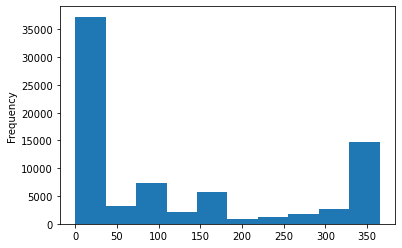

In [21]:
# histogram of availability_365
list_subset.availability_365.plot.hist()
plt.savefig('availability_hist.png')

In [22]:
# examine unique values of room_type

In [23]:
list_subset.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [24]:
len(list_subset.property_type.unique())

92

In [25]:
# check hosts with many properties
top_host=list_subset.host_id.value_counts()
top_host   

33889201     878
137094377    283
13557337     279
48165024     267
28820321     242
            ... 
6112319        1
86686784       1
1356865        1
28879938       1
319299580      1
Name: host_id, Length: 51141, dtype: int64

In [26]:
# check with host_total_listings_count
list_subset.sort_values(by=['host_total_listings_count'], ascending=False).head(3)

list_id                            listing_url  \
54532  35953769  https://www.airbnb.com/rooms/35953769   
54534  35954363  https://www.airbnb.com/rooms/35954363   
66677  41811653  https://www.airbnb.com/rooms/41811653   

                                              list_name    host_id host_since  \
54532  Trendy 1 Bed Apartment Near South Harrow Station  175128252 2018-02-24   
54534      Comfy 1 Bed Apartment Near Roxeth Playground  175128252 2018-02-24   
66677           ☆Attractive Studio Close To London Zoo☆  175128252 2018-02-24   

       host_total_listings_count boro_name  latitude  longitude  \
54532                     1490.0    Harrow  51.56493   -0.35277   
54534                     1490.0    Harrow  51.56541   -0.35123   
66677                     1490.0    Camden  51.53862   -0.15310   

          property_type        room_type   price  availability_365  
54532  Entire apartment  Entire home/apt  1880.0               180  
54534  Entire apartment  Entire home/apt  1880.0               180  
66677  Entire apartment  Entire home/apt    61.0                19

In [27]:
# the number does not match, host_id==175128252 has total count of 1490 but only has three listings
list_subset[list_subset['host_id']==175128252]

list_id                            listing_url  \
54532  35953769  https://www.airbnb.com/rooms/35953769   
54534  35954363  https://www.airbnb.com/rooms/35954363   
66677  41811653  https://www.airbnb.com/rooms/41811653   

                                              list_name    host_id host_since  \
54532  Trendy 1 Bed Apartment Near South Harrow Station  175128252 2018-02-24   
54534      Comfy 1 Bed Apartment Near Roxeth Playground  175128252 2018-02-24   
66677           ☆Attractive Studio Close To London Zoo☆  175128252 2018-02-24   

       host_total_listings_count boro_name  latitude  longitude  \
54532                     1490.0    Harrow  51.56493   -0.35277   
54534                     1490.0    Harrow  51.56541   -0.35123   
66677                     1490.0    Camden  51.53862   -0.15310   

          property_type        room_type   price  availability_365  
54532  Entire apartment  Entire home/apt  1880.0               180  
54534  Entire apartment  Entire home/apt  1880.0               180  
66677  Entire apartment  Entire home/apt    61.0                19

In [28]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index': 'Host_id', 'host_id':'P_Count'}, inplace=True)
top_host_df

Host_id  P_Count
0       33889201      878
1      137094377      283
2       13557337      279
3       48165024      267
4       28820321      242
...          ...      ...
51136    6112319        1
51137   86686784        1
51138    1356865        1
51139   28879938        1
51140  319299580        1

[51141 rows x 2 columns]

In [29]:
# suspicious host 1 
ls = list_subset[list_subset['host_id']==33889201] 
ls[ls['price']==10]

list_id                            listing_url  \
47209  31463709  https://www.airbnb.com/rooms/31463709   
60436  39023330  https://www.airbnb.com/rooms/39023330   
68546  42595294  https://www.airbnb.com/rooms/42595294   
68892  42703023  https://www.airbnb.com/rooms/42703023   
68893  42703277  https://www.airbnb.com/rooms/42703277   

                                               list_name   host_id host_since  \
47209       Beautiful and big 6 BR family home, by Veeve  33889201 2015-05-21   
60436  Gorgeous 2BR garden & parking in Highgate (Veeve)  33889201 2015-05-21   
68546                               Chic Paddington Mews  33889201 2015-05-21   
68892                          On a Knightsbridge Square  33889201 2015-05-21   
68893                       Riverside Views in Belgravia  33889201 2015-05-21   

       host_total_listings_count               boro_name  latitude  longitude  \
47209                     1105.0  Hammersmith and Fulham  51.47267   -0.19410   
60436                     1105.0                Haringey  51.57799   -0.14819   
68546                     1105.0             Westminster  51.51801   -0.18094   
68892                     1105.0             Westminster  51.49888   -0.16558   
68893                     1105.0             Westminster  51.48556   -0.14955   

          property_type        room_type  price  availability_365  
47209      Entire house  Entire home/apt   10.0                 0  
60436  Entire apartment  Entire home/apt   10.0                 0  
68546      Entire house  Entire home/apt   10.0                 0  
68892      Entire house  Entire home/apt   10.0                 0  
68893  Entire apartment  Entire home/apt   10.0                 0

In [30]:
# examine the suspicious host 1 (ID == 33889201) by count the number of listings for each borough
host1 = list_subset.host_id == 33889201

list_subset[host1].boro_name.value_counts()
pd.DataFrame(list_subset[host1].groupby('boro_name')
             ['list_id'].nunique())


list_id
boro_name                      
Barnet                        8
Brent                        21
Camden                       78
City of London                2
Ealing                       13
Greenwich                     6
Hackney                      44
Hammersmith and Fulham      102
Haringey                     15
Hounslow                     18
Islington                    81
Kensington and Chelsea      110
Kingston upon Thames          1
Lambeth                      54
Merton                       35
Richmond upon Thames         28
Southwark                    23
Tower Hamlets                34
Wandsworth                  128
Westminster                  77

In [31]:
# also check listing's room type 
pd.DataFrame(list_subset[host1].groupby('room_type')
             ['list_id'].nunique())

list_id
room_type               
Entire home/apt      877
Private room           1

In [32]:
# find host with multiple private rooms
private = list_subset[list_subset['room_type'] == "Private room"]
host_private = private.groupby(['host_id']).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)
host_private.head()

host_id  private_rooms
5458    13557337            249
25189  363308515             58
7155    20422553             40
10266   35424755             38
22089  224866971             37

In [33]:
# suspicious host 2
ls = list_subset[list_subset['host_id']==13557337]
len(ls)

279

In [34]:
# host_id == 13557337 
host2 = list_subset.host_id == 13557337

list_subset[host2].boro_name.value_counts()
pd.DataFrame(list_subset[host1].groupby('boro_name')
             ['list_id'].nunique())

list_id
boro_name                      
Barnet                        8
Brent                        21
Camden                       78
City of London                2
Ealing                       13
Greenwich                     6
Hackney                      44
Hammersmith and Fulham      102
Haringey                     15
Hounslow                     18
Islington                    81
Kensington and Chelsea      110
Kingston upon Thames          1
Lambeth                      54
Merton                       35
Richmond upon Thames         28
Southwark                    23
Tower Hamlets                34
Wandsworth                  128
Westminster                  77

In [35]:
pd.DataFrame(list_subset[host2].groupby('room_type')
             ['list_id'].nunique())

list_id
room_type               
Entire home/apt       30
Private room         249

## Data Analysis 

In [36]:
# 1. relationship between roome type on price

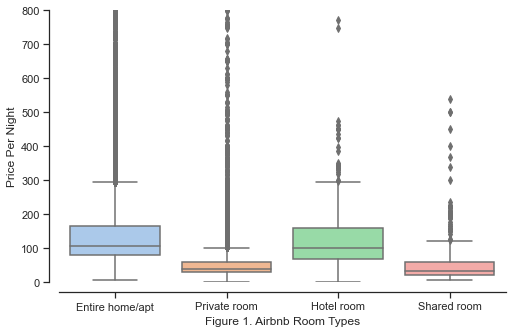

In [37]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=list_subset.price, x=list_subset.room_type)
sns.despine(offset=10)
ax.set_ylim([0,800])
plt.xlabel('Figure 1. Airbnb Room Types', fontsize=12)
plt.ylabel('Price Per Night', fontsize=12)
plt.savefig('room_type_price_boxplot.png')

In [38]:
# 2. relationship between property type on price

In [39]:
lst = list_subset.groupby('room_type')['property_type'].value_counts().sort_values(ascending=False)
lst = pd.DataFrame(lst)
lst

property_type
room_type       property_type                           
Entire home/apt Entire apartment                   32301
Private room    Private room in apartment          17956
                Private room in house              11140
Entire home/apt Entire house                        5635
Private room    Private room in townhouse           1552
...                                                  ...
Entire home/apt Earth house                            1
                Island                                 1
                Lighthouse                             1
                Yurt                                   1
Shared room     Shared room in tent                    1

[97 rows x 1 columns]

In [40]:
# subset entire room/apt
ent_home = list_subset[list_subset['room_type'] == 'Entire home/apt']
ent_home.head(3)
len(ent_home)

42209

In [41]:
# subset private room 
pri_home = list_subset[list_subset['room_type'] == 'Private room']
pri_home.head(3)
len(pri_home)

33578

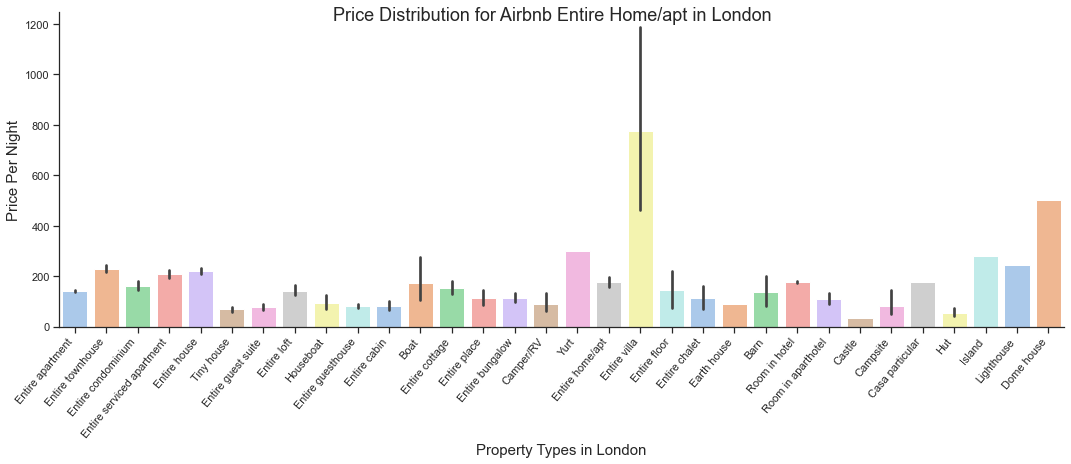

In [42]:
# price distribution on different types of 'entire home/apt' 
pl=sns.catplot(x='property_type', y='price',  kind='bar', data=ent_home, aspect = 3, palette="pastel")
pl.set_xticklabels(rotation=50, horizontalalignment='right')
pl.fig.suptitle("Price Distribution for Airbnb Entire Home/apt in London", fontsize=18)
plt.xlabel('Property Types in London', fontsize=15)
plt.ylabel('Price Per Night', fontsize=15)
plt.savefig('price_dist_entire_home.png')

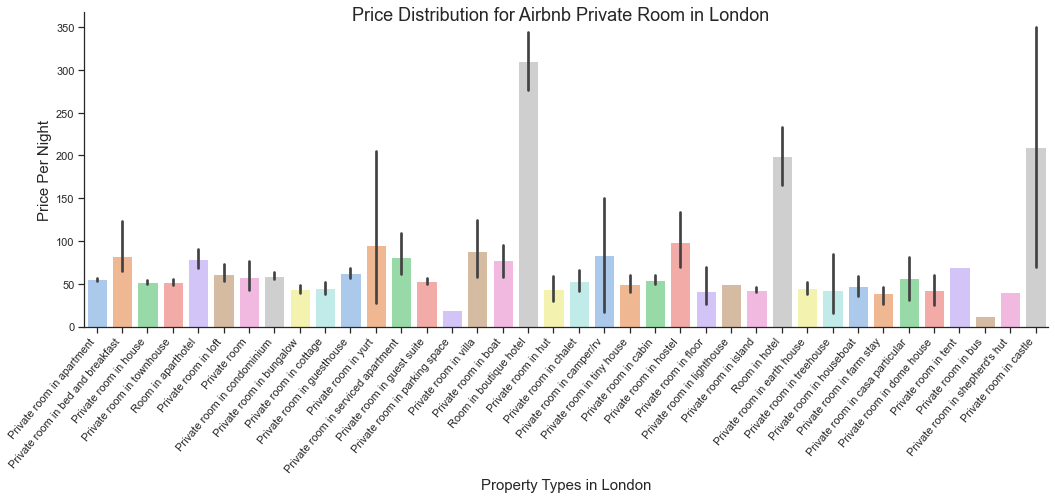

In [43]:
# looking at all the property types in 'Private room'
pl=sns.catplot(x='property_type', y='price',  kind='bar', data=pri_home, aspect = 3, palette="pastel")
pl.set_xticklabels(rotation=50, horizontalalignment='right')
pl.fig.suptitle("Price Distribution for Airbnb Private Room in London", fontsize=18)
plt.xlabel('Property Types in London', fontsize=15)
plt.ylabel('Price Per Night', fontsize=15)
plt.savefig('price_dist_prive_room.png')

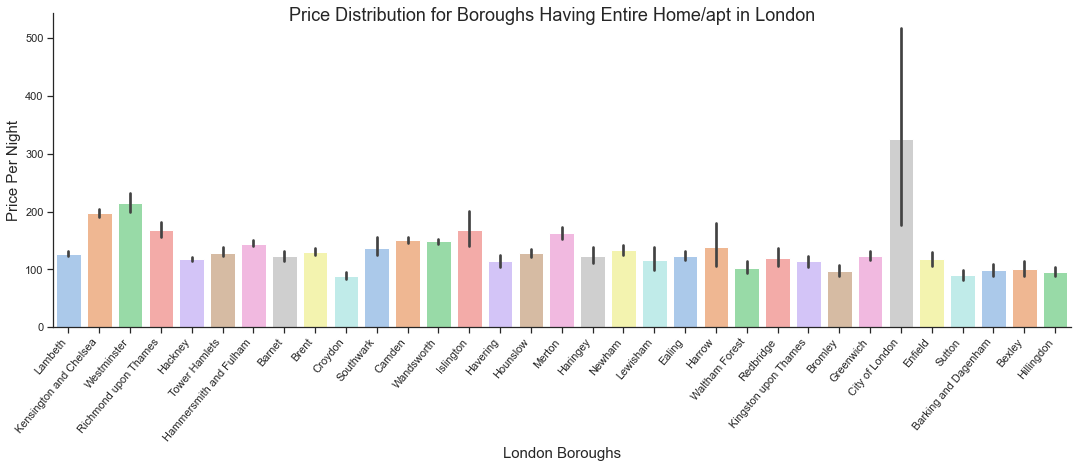

In [44]:
# boroughs vs. price in entire home/apt
pl=sns.catplot(x='boro_name', y='price',  kind='bar', data=ent_home, aspect = 3, palette="pastel")
pl.set_xticklabels(rotation=50, horizontalalignment='right')
pl.fig.suptitle("Price Distribution for Boroughs Having Entire Home/apt in London", fontsize=18)
plt.xlabel('London Boroughs', fontsize=15)
plt.ylabel('Price Per Night', fontsize=15)
plt.savefig('boro_entire_home.png')

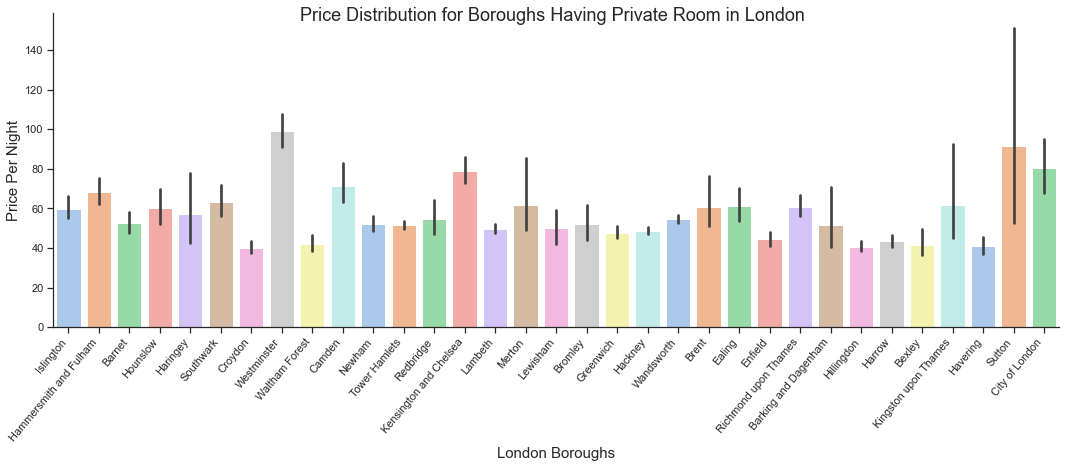

In [45]:
# boroughs vs. price in private home/apt
pl=sns.catplot(x='boro_name', y='price', kind='bar', data=pri_home, aspect = 3, palette="pastel")
pl.set_xticklabels(rotation=50, horizontalalignment='right')
pl.fig.suptitle("Price Distribution for Boroughs Having Private Room in London", fontsize=18)
plt.xlabel('London Boroughs', fontsize=15)
plt.ylabel('Price Per Night', fontsize=15)
plt.savefig('boro_private_room.png')

In [46]:
# 3. listings by neighborhood 

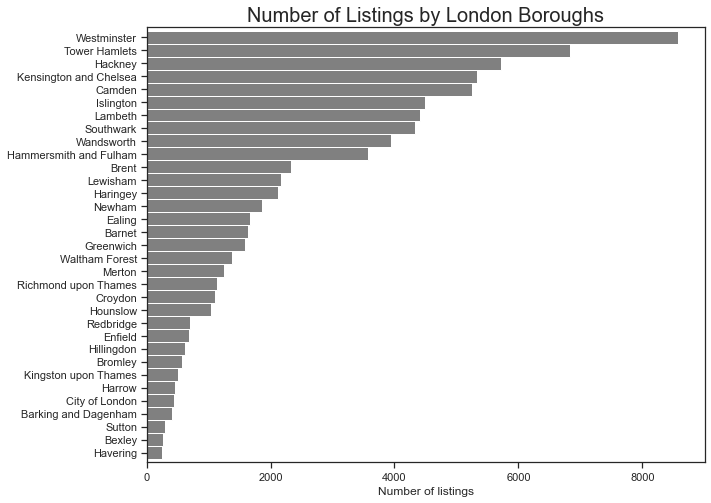

<Figure size 432x288 with 0 Axes>

In [47]:
feq=list_subset['boro_name'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='gray', width=1)
plt.title("Number of Listings by London Boroughs", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()
plt.savefig('listings_boros.png')

In [48]:
# check price distribution in top 5 most listings borough
# Westminster
sub_1=list_subset.loc[list_subset['boro_name'] == 'Westminster']
price_sub1=sub_1[['price']]
# Tower Hamlets
sub_2=list_subset.loc[list_subset['boro_name'] == 'Tower Hamlets']
price_sub2=sub_2[['price']]
# Hackney
sub_3=list_subset.loc[list_subset['boro_name'] == 'Hackney']
price_sub3=sub_3[['price']]
# Kensington and Chelsea
sub_4=list_subset.loc[list_subset['boro_name'] == 'Kensington and Chelsea']
price_sub4=sub_4[['price']]
# Camden
sub_5=list_subset.loc[list_subset['boro_name'] == 'Camden']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [49]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Westminster', 'Tower Hamlets', 'Hackney', 'Kensington and Chelsea', 'Camden']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

Westminster  Tower Hamlets  Hackney  Kensington and Chelsea  Camden
Stats                                                                     
min            8.0            0.0      0.0                     0.0     9.0
25%           72.0           39.0     40.0                    79.0    55.0
50%          110.0           64.0     67.0                   120.0    90.0
75%          190.0          100.0    100.0                   199.0   145.0
max        18673.0         7000.0   2190.0                  6250.0  7551.0

In [50]:
ls = list_subset[list_subset['price']==18673]
ls.list_name

29480    Cosy and affordable 2 bed ad 2 bath in Padding...
Name: list_name, dtype: object

In [51]:
list_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76984 entries, 0 to 76983
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   list_id                    76984 non-null  int64         
 1   listing_url                76984 non-null  object        
 2   list_name                  76961 non-null  object        
 3   host_id                    76984 non-null  int64         
 4   host_since                 76973 non-null  datetime64[ns]
 5   host_total_listings_count  76984 non-null  float64       
 6   boro_name                  76984 non-null  object        
 7   latitude                   76984 non-null  float64       
 8   longitude                  76984 non-null  float64       
 9   property_type              76984 non-null  object        
 10  room_type                  76984 non-null  object        
 11  price                      76984 non-null  float64       
 12  avai

In [52]:
# we can see from our statistical table that we have some extreme values, 
# therefore we need to remove them for the sake of a better visualization

# creating a sub-dataframe with no extreme values / less than 50 and only counted for private room where ghost
price_subset =list_subset[(list_subset.room_type=='Entire home/apt') & (list_subset.price < 500)]
price_subset.head()


list_id                         listing_url  \
0    11551  https://www.airbnb.com/rooms/11551   
2    15400  https://www.airbnb.com/rooms/15400   
3    17402  https://www.airbnb.com/rooms/17402   
7    36299  https://www.airbnb.com/rooms/36299   
9    36986  https://www.airbnb.com/rooms/36986   

                                           list_name  host_id host_since  \
0         Arty and Bright London Apartment in Zone 2    43039 2009-10-03   
2                Bright Chelsea  Apartment. Chelsea!    60302 2009-12-05   
3              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564 2010-01-04   
7                Kew Gardens 3BR house in cul-de-sac   155938 2010-06-30   
9  Gorgeous Victorian Flat Overlooking London Fields   159556 2010-07-06   

   host_total_listings_count               boro_name  latitude  longitude  \
0                        3.0                 Lambeth  51.46225   -0.11732   
2                        1.0  Kensington and Chelsea  51.48796   -0.16898   
3                       18.0             Westminster  51.52195   -0.14094   
7                        1.0    Richmond upon Thames  51.47934   -0.28066   
9                        2.0                 Hackney  51.53972   -0.05885   

      property_type        room_type  price  availability_365  
0  Entire apartment  Entire home/apt   97.0               279  
2  Entire apartment  Entire home/apt   75.0               150  
3  Entire apartment  Entire home/apt  307.0               330  
7  Entire townhouse  Entire home/apt  195.0               317  
9  Entire apartment  Entire home/apt   80.0                90

In [53]:
# Load Spatial Data

In [54]:
# load borough spatial data 
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')

/Users/yingchen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [55]:
boros.head(3)

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0  Kingston upon Thames  E09000021   3726.117         0.0         F   
1               Croydon  E09000008   8649.441         0.0         F   
2               Bromley  E09000006  15013.487         0.0         F   

                                            geometry  
0  MULTIPOLYGON (((516401.600 160201.800, 516407....  
1  MULTIPOLYGON (((535009.200 159504.700, 535005....  
2  MULTIPOLYGON (((540373.600 157530.400, 540361....

In [56]:
# load msoa spatial data
msoas = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip?raw=true')

In [57]:
msoas.head(3)

OBJECTID   MSOA11CD                  MSOA11NM                 MSOA11NMW  \
0         1  E02000001        City of London 001        City of London 001   
1         2  E02000002  Barking and Dagenham 001  Barking and Dagenham 001   
2         3  E02000003  Barking and Dagenham 002  Barking and Dagenham 002   

    BNG_E   BNG_N      LONG       LAT    Shape__Are   Shape__Len  \
0  532384  181355 -0.093490  51.51561  2.906361e+06  8936.818478   
1  548267  189685  0.138756  51.58652  2.166163e+06  8150.405928   
2  548259  188520  0.138149  51.57605  2.143568e+06  9118.196243   

                                            geometry  
0  POLYGON ((532135.138 182198.131, 532158.250 18...  
1  POLYGON ((548881.563 190845.265, 548881.125 19...  
2  POLYGON ((549102.438 189324.625, 548954.517 18...

In [58]:
# clip london msoa boundary
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

# In order to ensure that we get all MSOAs _within_ London 
# we will buffer the boundary by 250m. If _cover_ were 
# easier to use then that option might be preferable.
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')

ldn_msoas = gpd.sjoin(msoas, ldn, op='within')

In [59]:
ldn_msoas.head(3)

OBJECTID   MSOA11CD                  MSOA11NM                 MSOA11NMW  \
0         1  E02000001        City of London 001        City of London 001   
1         2  E02000002  Barking and Dagenham 001  Barking and Dagenham 001   
2         3  E02000003  Barking and Dagenham 002  Barking and Dagenham 002   

    BNG_E   BNG_N      LONG       LAT    Shape__Are   Shape__Len  \
0  532384  181355 -0.093490  51.51561  2.906361e+06  8936.818478   
1  548267  189685  0.138756  51.58652  2.166163e+06  8150.405928   
2  548259  188520  0.138149  51.57605  2.143568e+06  9118.196243   

                                            geometry  index_right  \
0  POLYGON ((532135.138 182198.131, 532158.250 18...            0   
1  POLYGON ((548881.563 190845.265, 548881.125 19...            0   
2  POLYGON ((549102.438 189324.625, 548954.517 18...            0   

                                            original  
0  POLYGON ((535009.200 159504.700, 535005.500 15...  
1  POLYGON ((535009.200 159504.700, 535005.500 15...  
2  POLYGON ((535009.200 159504.700, 535005.500 15...

In [60]:
# add a new column 'Borough' by trimming last four characters in column 'MSOA11NM'
ldn_msoas['Borough'] = ldn_msoas.MSOA11NM.str.replace(r' \d+$','',regex=True)

print(ldn_msoas.Borough.unique())
print(len(ldn_msoas.Borough.unique()))

['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']
33


In [61]:
# delete columns do not need 
to_drop = ['MSOA11NMW','LONG','LAT','Shape__Are','Shape__Len','index_right',
           'original','BNG_E', 'BNG_N']
ldn_msoas.drop(columns=to_drop, inplace=True)
print(ldn_msoas.shape)

(983, 5)


In [62]:
ldn_msoas.head(3)
len(ldn_msoas)

983

In [63]:
cols = ['Middle Super Output Area',
        'MSOA Name',
        'Dwelling type (2011);Household spaces with no usual residents;',
       'Dwelling type (2011);Flat, maisonette or apartment (%);',
       'Dwelling type (2011);Household spaces with no usual residents (%);',
       'Population Density;Persons per hectare (2012);',
       'House Prices;Median House Price (£);2013 (p)',
       'House Prices;Sales;2013(p)',
       'Income Deprivation (2010);% living in income deprived households reliant on means tested benefit;',]

In [64]:
# add housing data from 2011 census
url = "https://data.london.gov.uk/download/msoa-atlas/20264159-36cb-4aa2-8371-ae884ae83e88/msoa-data.csv"
housing = pd.read_csv(url, encoding= 'unicode_escape', usecols = cols, low_memory=False)

In [65]:
housing.head(3)

Middle Super Output Area                 MSOA Name  \
0                E02000001        City of London 001   
1                E02000002  Barking and Dagenham 001   
2                E02000003  Barking and Dagenham 002   

   Dwelling type (2011);Household spaces with no usual residents;  \
0                                               1145                
1                                                 82                
2                                                110                

   Dwelling type (2011);Household spaces with no usual residents (%);  \
0                                               20.7                    
1                                                2.9                    
2                                                2.8                    

   Dwelling type (2011);Flat, maisonette or apartment (%);  \
0                                               98.0         
1                                               38.9         
2                                               31.8         

   Population Density;Persons per hectare (2012);  \
0                                            26.2   
1                                            31.7   
2                                            47.7   

   House Prices;Median House Price (£);2013 (p)  House Prices;Sales;2013(p)  \
0                                        595000                         353   
1                                        190000                          61   
2                                        237000                          98   

   Income Deprivation (2010);% living in income deprived households reliant on means tested benefit;  
0                                                5.2                                                  
1                                               31.0                                                  
2                                               18.9

In [66]:
# select columns 
housing.rename(columns={"Middle Super Output Area": "msoa_code",
                           "Dwelling type (2011);Household spaces with no usual residents;": "space_with_no_resi",
                           "Dwelling type (2011);Flat, maisonette or apartment (%);": "apt_percent",
                           "Dwelling type (2011);Household spaces with no usual residents (%);": "space_with_no_resi_percent",
                           "Population Density;Persons per hectare (2012);": "pop_density",
                           "House Prices;Median House Price (£);2013 (p)": "house_price2013",
                           "House Prices;Sales;2013(p)": "sale_price2013",
                           "Income Deprivation (2010);% living in income deprived households reliant on means tested benefit;": "deprived_household_percent"},
                  inplace=True)
housing.head(3)
len(housing)

984

In [67]:
# merge with ldn_msoas
ldn_mgd = pd.merge(ldn_msoas, housing, left_on="MSOA11CD", right_on="msoa_code", how='inner')

ldn_mgd.drop(columns=['MSOA11CD','MSOA11NM'], inplace=True)
ldn_mgd.head(3)
#len(ldn_mgd)

OBJECTID                                           geometry  \
0         1  POLYGON ((532135.138 182198.131, 532158.250 18...   
1         2  POLYGON ((548881.563 190845.265, 548881.125 19...   
2         3  POLYGON ((549102.438 189324.625, 548954.517 18...   

                Borough  msoa_code                 MSOA Name  \
0        City of London  E02000001        City of London 001   
1  Barking and Dagenham  E02000002  Barking and Dagenham 001   
2  Barking and Dagenham  E02000003  Barking and Dagenham 002   

   space_with_no_resi  space_with_no_resi_percent  apt_percent  pop_density  \
0                1145                        20.7         98.0         26.2   
1                  82                         2.9         38.9         31.7   
2                 110                         2.8         31.8         47.7   

   house_price2013  sale_price2013  deprived_household_percent  
0           595000             353                         5.2  
1           190000              61                        31.0  
2           237000              98                        18.9

In [68]:
# join with airbnb subset

In [69]:
# recall
price_subset.head(3)
len(price_subset)

41295

In [70]:
# trun airbnb listings to spatial data
airbnb = gpd.GeoDataFrame(price_subset, geometry=gpd.points_from_xy(price_subset.longitude, price_subset.latitude, crs='epsg:4326'))
airbnb = airbnb.to_crs('epsg:27700')

In [71]:
airbnb.drop(columns=['latitude', 'longitude', 'room_type','listing_url'], inplace=True)

In [72]:
airbnb.head(3)
#len(airbnb)

list_id                                   list_name  host_id host_since  \
0    11551  Arty and Bright London Apartment in Zone 2    43039 2009-10-03   
2    15400         Bright Chelsea  Apartment. Chelsea!    60302 2009-12-05   
3    17402       Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564 2010-01-04   

   host_total_listings_count               boro_name     property_type  price  \
0                        3.0                 Lambeth  Entire apartment   97.0   
2                        1.0  Kensington and Chelsea  Entire apartment   75.0   
3                       18.0             Westminster  Entire apartment  307.0   

   availability_365                       geometry  
0               279  POINT (530885.122 175377.940)  
2               150  POINT (527225.119 178145.995)  
3               330  POINT (529075.790 181974.865)

In [73]:
airbnb.shape  # entire home/apt left with 41295 listings (originally have 42209 listings)

(41295, 10)

## Data Visulization

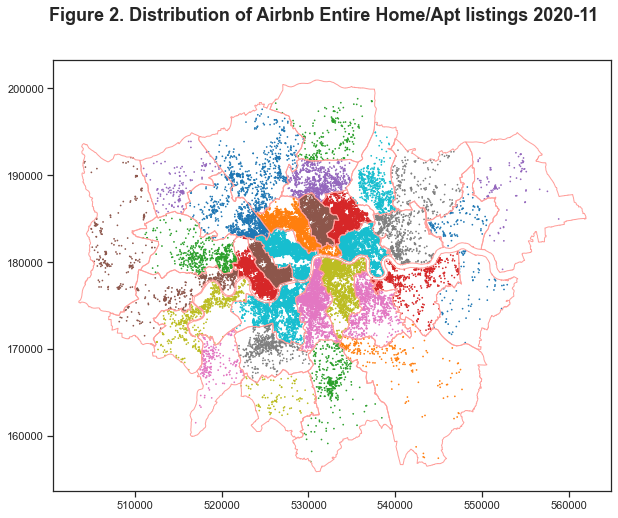

In [74]:
ax = airbnb.plot(column='boro_name', markersize=0.5, alpha=1, figsize=(10,8))
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=1)
plt.gcf().subplots_adjust(top=0.9)
plt.gcf().suptitle("Figure 2. Distribution of Airbnb Entire Home/Apt listings 2020-11", fontsize=18, fontweight='bold')
plt.savefig('Listings_dist.png')

In [75]:
# spatial join airbnb listings to combined london lsoas layer 
airbnb_final  = gpd.sjoin(airbnb, ldn_msoas, op='within')
len(airbnb_final)

41282

In [76]:
airbnb_final.head(3)

list_id                                          list_name  host_id  \
0       11551         Arty and Bright London Apartment in Zone 2    43039   
62      73431  Two bedroom luxury Flat in Brixton with city v...   383525   
1873  1194557                  Lovely Bright Brixton Garden flat  5903673   

     host_since  host_total_listings_count boro_name     property_type  price  \
0    2009-10-03                        3.0   Lambeth  Entire apartment   97.0   
62   2011-02-09                        1.0   Lambeth  Entire apartment   85.0   
1873 2013-04-13                        1.0   Lambeth  Entire apartment  110.0   

      availability_365                       geometry  index_right  OBJECTID  \
0                  279  POINT (530885.122 175377.940)          611       612   
62                  10  POINT (531335.470 175353.929)          611       612   
1873                 0  POINT (531414.745 175083.347)          611       612   

       MSOA11CD     MSOA11NM  Borough  
0     E02000633  Lambeth 016  Lambeth  
62    E02000633  Lambeth 016  Lambeth  
1873  E02000633  Lambeth 016  Lambeth

In [77]:
# group msoa by airbnb price
grouped_price = airbnb_final.groupby('MSOA11CD').agg({'price':['median','count']}).reset_index()
grouped_price.columns = grouped_price.columns.get_level_values(1)
grouped_price.rename(columns={'':'MSOA11CD', 'count':'total_listings', 'median': 'median_price'}, inplace=True)
grouped_price.head(3)
#len(grouped_price)
# the number 954 shows 954 (out of 983) msoa in london have entire home/apt listing.

MSOA11CD  median_price  total_listings
0  E02000001         111.0             382
1  E02000003         213.0               3
2  E02000005         150.0               3

In [78]:
# join with merged london msoa
final_data= pd.merge(grouped_price, ldn_mgd, left_on="MSOA11CD", right_on="msoa_code", how='left')
final_data.head(3)
#len(final_data)

MSOA11CD  median_price  total_listings  OBJECTID  \
0  E02000001         111.0             382         1   
1  E02000003         213.0               3         3   
2  E02000005         150.0               3         5   

                                            geometry               Borough  \
0  POLYGON ((532135.138 182198.131, 532158.250 18...        City of London   
1  POLYGON ((549102.438 189324.625, 548954.517 18...  Barking and Dagenham   
2  POLYGON ((549099.634 187656.076, 549161.375 18...  Barking and Dagenham   

   msoa_code                 MSOA Name  space_with_no_resi  \
0  E02000001        City of London 001                1145   
1  E02000003  Barking and Dagenham 002                 110   
2  E02000005  Barking and Dagenham 004                  89   

   space_with_no_resi_percent  apt_percent  pop_density  house_price2013  \
0                        20.7         98.0         26.2           595000   
1                         2.8         31.8         47.7           237000   
2                         2.7         11.4         72.9           180000   

   sale_price2013  deprived_household_percent  
0             353                         5.2  
1              98                        18.9  
2              75                        22.9

In [79]:
# select columns to do correlation matrix
corr_data = final_data[['median_price', 'total_listings','space_with_no_resi_percent', 
                        'apt_percent', 'pop_density', 'house_price2013', 'sale_price2013', 'deprived_household_percent']]
corr_data.head(3)

median_price  total_listings  space_with_no_resi_percent  apt_percent  \
0         111.0             382                        20.7         98.0   
1         213.0               3                         2.8         31.8   
2         150.0               3                         2.7         11.4   

   pop_density  house_price2013  sale_price2013  deprived_household_percent  
0         26.2           595000             353                         5.2  
1         47.7           237000              98                        18.9  
2         72.9           180000              75                        22.9

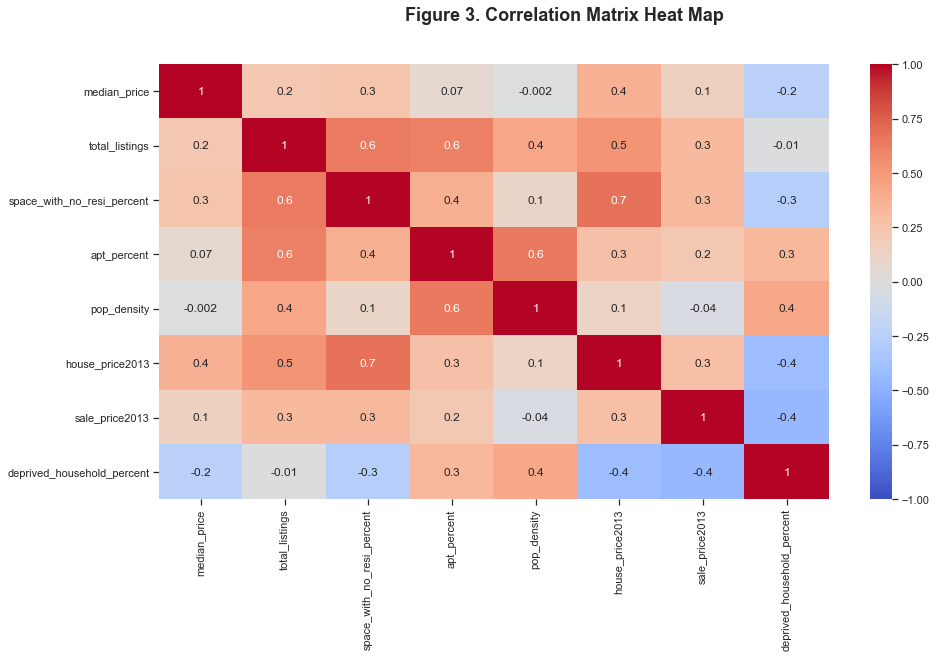

In [80]:
# correlation matrix 
plt.figure(figsize=(15,8))
corr = corr_data.corr(method='pearson')
plt.gcf().suptitle("Figure 3. Correlation Matrix Heat Map", fontsize=18, fontweight='bold')
sns.heatmap(corr, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.savefig('corre_matrix.png')

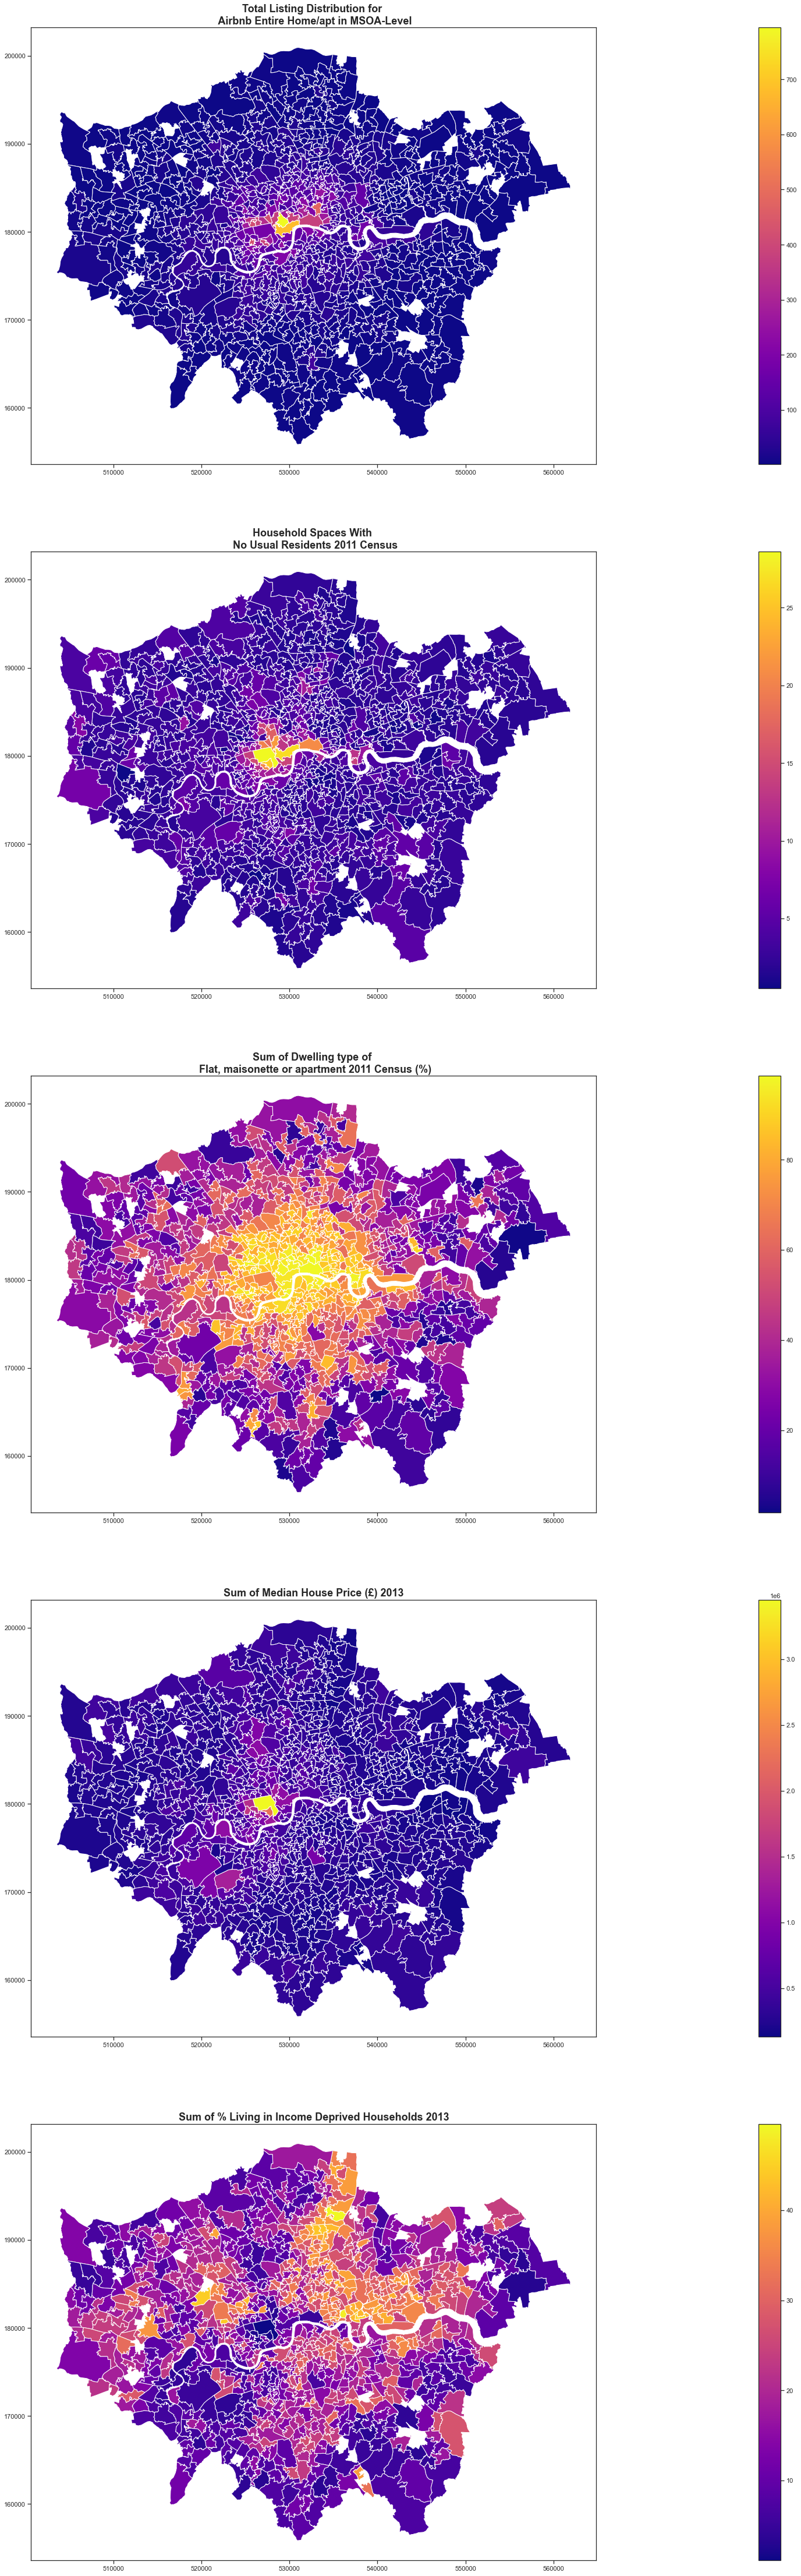

In [81]:
# Plot varibales that have relatively strong correlation (positive/negative) with total listings

f,axes = plt.subplots(5,1,figsize=(100,80))
final_data = final_data.set_geometry('geometry')

final_data.plot(column='total_listings', ax=axes[0], legend=True, cmap='plasma')
final_data.copy().plot(column='space_with_no_resi_percent', ax=axes[1], legend=True, cmap='plasma')
final_data.copy().plot(column='apt_percent', ax=axes[2], legend=True, cmap='plasma')
final_data.copy().plot(column='house_price2013', ax=axes[3], legend=True, cmap='plasma')
final_data.copy().plot(column='deprived_household_percent', ax=axes[4], legend=True, cmap='plasma')


axes[0].set_title('Total Listing Distribution for \n Airbnb Entire Home/apt in MSOA-Level', size=18, fontweight='bold')
axes[1].set_title('Household Spaces With \n No Usual Residents 2011 Census', size=18, fontweight='bold')
axes[2].set_title('Sum of Dwelling type of \n Flat, maisonette or apartment 2011 Census (%)', size=18, fontweight='bold')
axes[3].set_title('Sum of Median House Price (£) 2013', size=18, fontweight='bold')
axes[4].set_title('Sum of % Living in Income Deprived Households 2013', size=18, fontweight='bold')

plt.savefig('listing_var.png')

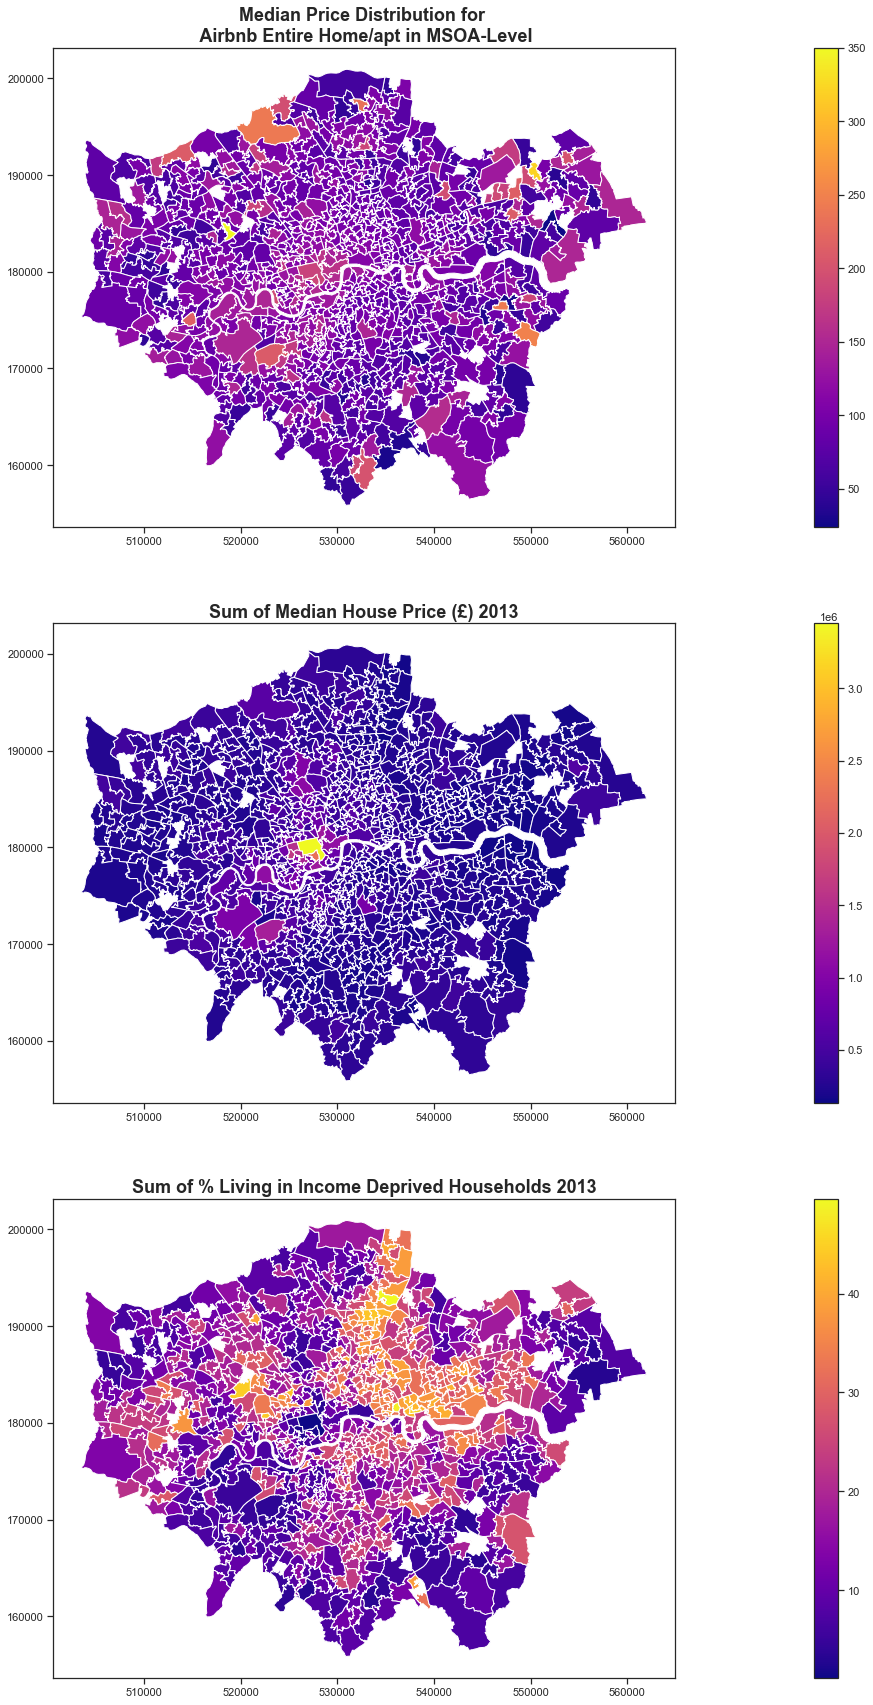

In [82]:
# Plot varibales that have relatively strong correlation (positive/negative) with median price
f,axes = plt.subplots(3,1,figsize=(50,30))
final_data = final_data.set_geometry('geometry')

final_data.plot(column='median_price', ax=axes[0], legend=True, cmap='plasma')
final_data.copy().plot(column='house_price2013', ax=axes[1], legend=True, cmap='plasma')
final_data.copy().plot(column='deprived_household_percent', ax=axes[2], legend=True, cmap='plasma')


axes[0].set_title('Median Price Distribution for \n Airbnb Entire Home/apt in MSOA-Level', size=18, fontweight='bold')
axes[1].set_title('Sum of Median House Price (£) 2013', size=18, fontweight='bold')
axes[2].set_title('Sum of % Living in Income Deprived Households 2013', size=18, fontweight='bold')

plt.savefig('price_var.png')

# Executive Summary

This report provides an introductory analysis of Airbnb’s activity in 2020. Drawing from basic steps of an exploratory data analysis (EDA) on Airbnb’s listing in London, the report examines the impact of Airbnb’s growing market on local household and gives insights on the following areas:
1.	Uneven distribution of listings between London boroughs
2.	Prices variation between London boroughs
3.	Potential illegal hosts with multiple listings
4.	Relationship between household’s dwelling types and socio-economic status on Airbnb’s entire home/apt listings and price

Key Findings: 

•	55% of listings is entire home/apt, compared to 0.8% of shared room in London. The number contradicts with Airbnb’s sharing and caring philosophy and further suggests a lack of interactions between host and guest. 44% of private room is subject to further investigation on its illegality since many of the listings on private room are indeed at the same (or close) location, contributing to what is known as “ghost hotels” which leaves space for Airbnb to manipulate data and report.


•	 Redundant minor categories on property types suggest a lack of formal regulation and standardized host registration on Airbnb. Many hosts are, I doubt, professional real estate salesman who have fake host information; never showed up in the listed properties and have over 800 listings across London boroughs. They run Airbnb business like hotels but with potential evasion of taxation. Many professional hosts list the same property in multiple listings to avoid 90-day short-term rule, causing negative impact on local neighborhood including forcing local residents to relocate their home because of rent rise; irresponsible for garbage disposal; allowing guests to have parties and disregard neighborhood safety and environment.


•	Data obtained from 2011 census reveals Airbnb’s entire home/apt listings have a positive correlation with households having empty spaces and households living in flat, maisonette or apartment, and a weak negative correlation between deprived households. Airbnb’s median price for entire home/apt listings is not as predictable as number of listings. Analysis results show the price is almost robust to households’ socio-economic characteristics except for a minor positive correlation to housing price. 

## Executive Breifing 

Airbnb as a growing industry of sharing economy, has created new opportunities and debate on global rental market. The definition of the sharing economy comes from firms depending on selling or renting internet-based services. This field grows fast following the pace of technology innovation and knowledge sharing and often are led by rich and venture capitalists or technologist who often disobey regulations and consider their actions as creation [1].


Airbnb initially aims to increase local housing supply for travelers and make travelling more affordable and focus on traveler-to-renter interaction. High price of travel accommodation is not a problem, but Airbnb reduces local housing supply and make local residents hard to find affordable housing. Because housing demand is relatively inelastic [2] (people’s demand for somewhere to live doesn’t decline when prices increase), even small changes in housing supply (like those caused by converting long-term rental properties to Airbnb units) can cause significant price increases. High-quality studies indicate that Airbnb introduction and expansion in New York City, for example, may have raised average rents by nearly $400 annually for city residents. The rising cost of housing is a key problem for American families. Housing costs have risen significantly faster than overall prices (and the price of short-term travel accommodations) since 2000, and housing accounts for a significant share (more than 15%) of overall household consumption expenditures. 


In London, housing and gentrification has long been an issue even before Airbnb was introduced [3]. Before 1973, section 25 of the Greater London Council (General Powers) Act was used to prevent long-term, unauthorized sleeping accommodation from happening and protect local residents from housing shortage. However, on 26th May 2015, the Deregulation Act was implemented to allow Londoners to rent short-term properties for maximum 90 days without special permission. The regulation is difficult to monitor and supervise, providing opportunities for people making money from subletting their properties and making Airbnb an global fast-growing company.


In this report, I will use London Airbnb listing data obtained from Inside Airbnb website [4], an open sourced data provider and mainly focus on Airbnb’s price and number of listings in 2020. Data was scraped by Inside Airbnb on 6th November 2020, so the data only reveals listings up to that time. The original dataset is large so I only selected the following columns in my analysis:

•	ID: unique Airbnb listing ID
•	Listing_url: the Airbnb webpage of the listing can be found 
•	Name: property description and the title name from the Airbnb webpage
•	Host_id: each host has an unique ID, which can be traced for the total number of listings they have
•	Host_since: year-month-day for the host registered in Airbnb
•	Neighbourhood_cleansed: 32 london borough names plus City of London
•	Latitude and longitude: geometry of each listing
•	Room_type: major category, divided into entire home/apt, private room, shared room, and hotel room
•	Property_type: minor category of room type
•	Availability_365: numerical data type, count the total number of days the listing is available 


The way Airbnb operates and accumulates wealth is likely to encourage more people handle their properties over to the professional operators and it makes hard to maintain host-guest rich interactions. Within 76,984 unique listings in London this year, 55% of them is entire home/apartment, 44% of private room, leaving shared room and hotel room accounting to only just over 2% of the whole market. When checking hosts with multiple properties, I identified two hosts as professional operators. The first suspicious host has the most, 878 listing properties across 20 London boroughs in November 2020. He/she has over 100 listings in Hammersmith and Fulham, Kensington and Chelsea, and Wandsworth, with 99% of his listings is entire home/apt, price ranging from £10 (entire house at Westminster/Haringey) to £1326 (entire house at Kensington and Chelsea) per night. The £10 per night listings are entirely unavailable for 365 days and the reasons for this need further investigation. The second suspicious host has the most private room listing (n=279) located in 20 out of 32 London boroughs as well. 89% of his/her listings are private room and again, I doubt he/she really takes care of the properties on his own. However, with limited information available, I cannot go further into the reasons because I think there are ethical reasons for not examining privacy information such as host name (although it is public on Airbnb website).


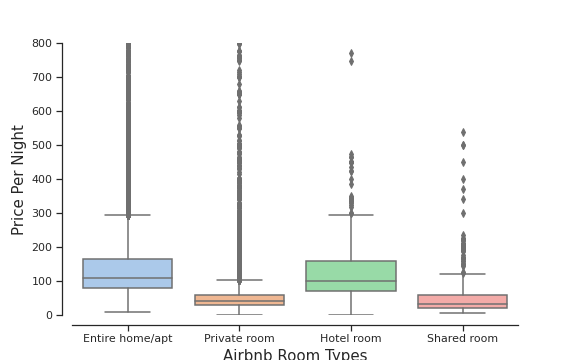

Further going into the variation between price on room type, on Figure 1, we can see entire home/apt is the most expensive type, average on £100 per night but the outliers go as far as over £1000. The second expensive category is hotel room which only takes 1.3% of market in the whole study period with average night price is also £100 but has considerably less outliers, showing price consistency in all boroughs. Private room and shared room are relatively affordable and average price is below £80 per night, but private room has huge outliers, suggesting the private room’s quality and standard might differ significantly. 

As wrote in the executive summary, there are 92 different property types in Airbnb website. The most expensive property under entire home/apt is entire villa, costing about £400 to £1200 per night. On the other hand, room in boutique hotel (£300/night), room in hotel (£200/night), and private room in castle (£200/night) are the most expensive ones for private room. From the subdivided categories of entire or private room we can see, many of the property names are not categorical but descriptive (i.e. private room in townhouse, private room in yurt, etc.) and confusing (i.e. room in hotel, private room in earth house, etc.) and I think Airbnb needs a proper way of managing their property types so that the numbers tell the truth. 

Looking at prices of entire home at borough level, City of London is outstanding for its uniquely expensive rent with an average £300/night compared to less than £200/night for most of others. On the other hand, if you prefer to share rooms in City of London, then the cost drops dramatically to only about £70/night. Westminster, however, having a considerably high price on private rooms, reaching to £100/night. But Westminster has the largest number of listings (over 8000) compared to other boroughs, revealing the market from tourism. Interestingly, the most expensive night staying at Westminster costs £18,673, but the listing’s name is “Cozy and affordable 2 bed ad 2 bath in Padding...”, suggesting a potential price error and further questioning the accuracy of the open soused data. 


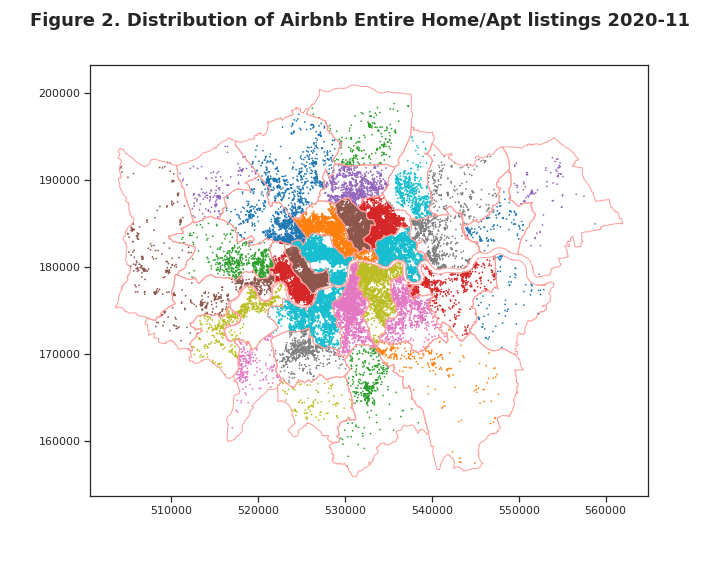

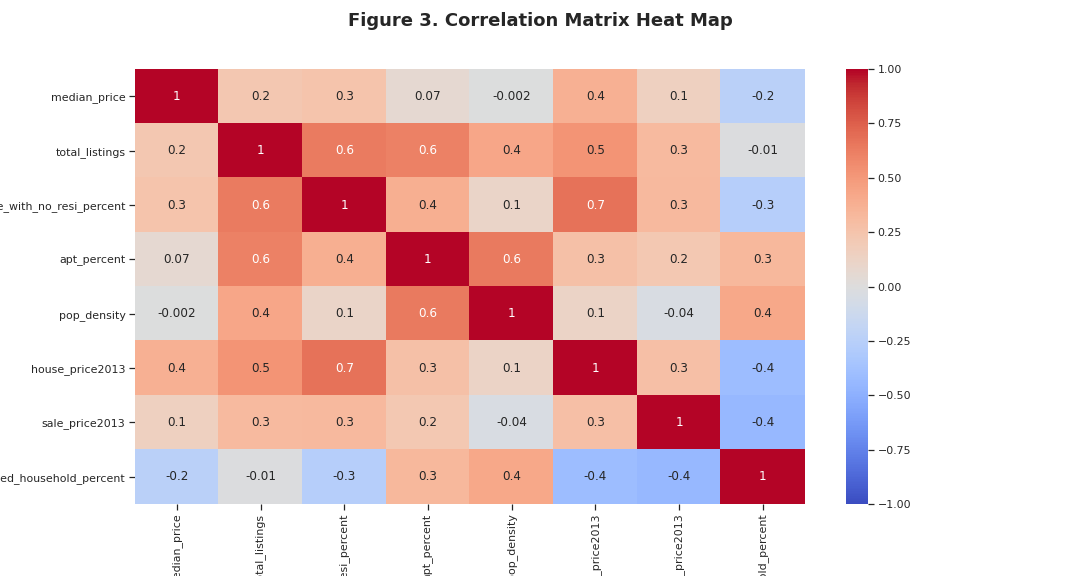

The last part of my analysis is spatial visualization, Figure 2 shows a simple density plot of the distribution of all Airbnb entire home/apt listings. Inner London has significantly more listings than Outer London, revealing spatial patterns that might influence how Airbnb chooses to expand their business. 

When finding the potential factors that results in disproportionate distribution of Airbnb business, I was inspired by the paper by Shabrina et al. [3] who assess Airbnb’s impact on local neighborhood from dwelling types in London. Therefore, household data is obtained from London Datastore and I selected columns containing “household”, “apartment”, “residents”, “population”, and “price and sale” from all columns, then I grouped all listings by MSOA code and calculated the number of entire home/apt listings in each MSOA and median price for joining with household data. The reason to only select entire home and apartment is because I think renting entire home might cause more negative impact on surroundings compared to live with a supervised host who theoretically will monitor guest’s behaviors.

Finally, a Pearson correlation matrix was performed in the correlation matrix heat map (Figure.3), showing a couple of interesting points: 1) listing of entire home/apt is positively correlated to households with no usual residents and households living in apartment. It can be explained as the more spaces without occupied by residents and the more people living in apartments, the higher chances that Airbnb will expand their business there. 2) listing of entire home/apt is negatively correlated to deprived households, meaning the places with more deprived households, the lower chances you would find Airbnb listings there. 3) listing’s median price is less subject to external factors, as the strongest correlation coefficient is 0.4 (with house price), showing Airbnb’s rental price is less likely to be affected by individual’s well-beings but more likely to be affected by macro-level change such as economy depression. 

According to correlation matrix, maps are created to have a comparison of patterns from Airbnb listing/price data verses household’s social indexes. Thus, Figure 4 is the comparison aimed to Airbnb listing file, where the first four maps highlight hotspots at Inner London showing similar patterns whereas the last map on income deprived households reveal a distinct and more reverse trend, proving a negative correlation. Figure 5 looks at comparison at Airbnb median price pattern verses social indexes; overall, median entire home/apt in London is relatively evenly distributed, not many hotspots or outliers. However, the median house prices and deprived households show very different picture.  

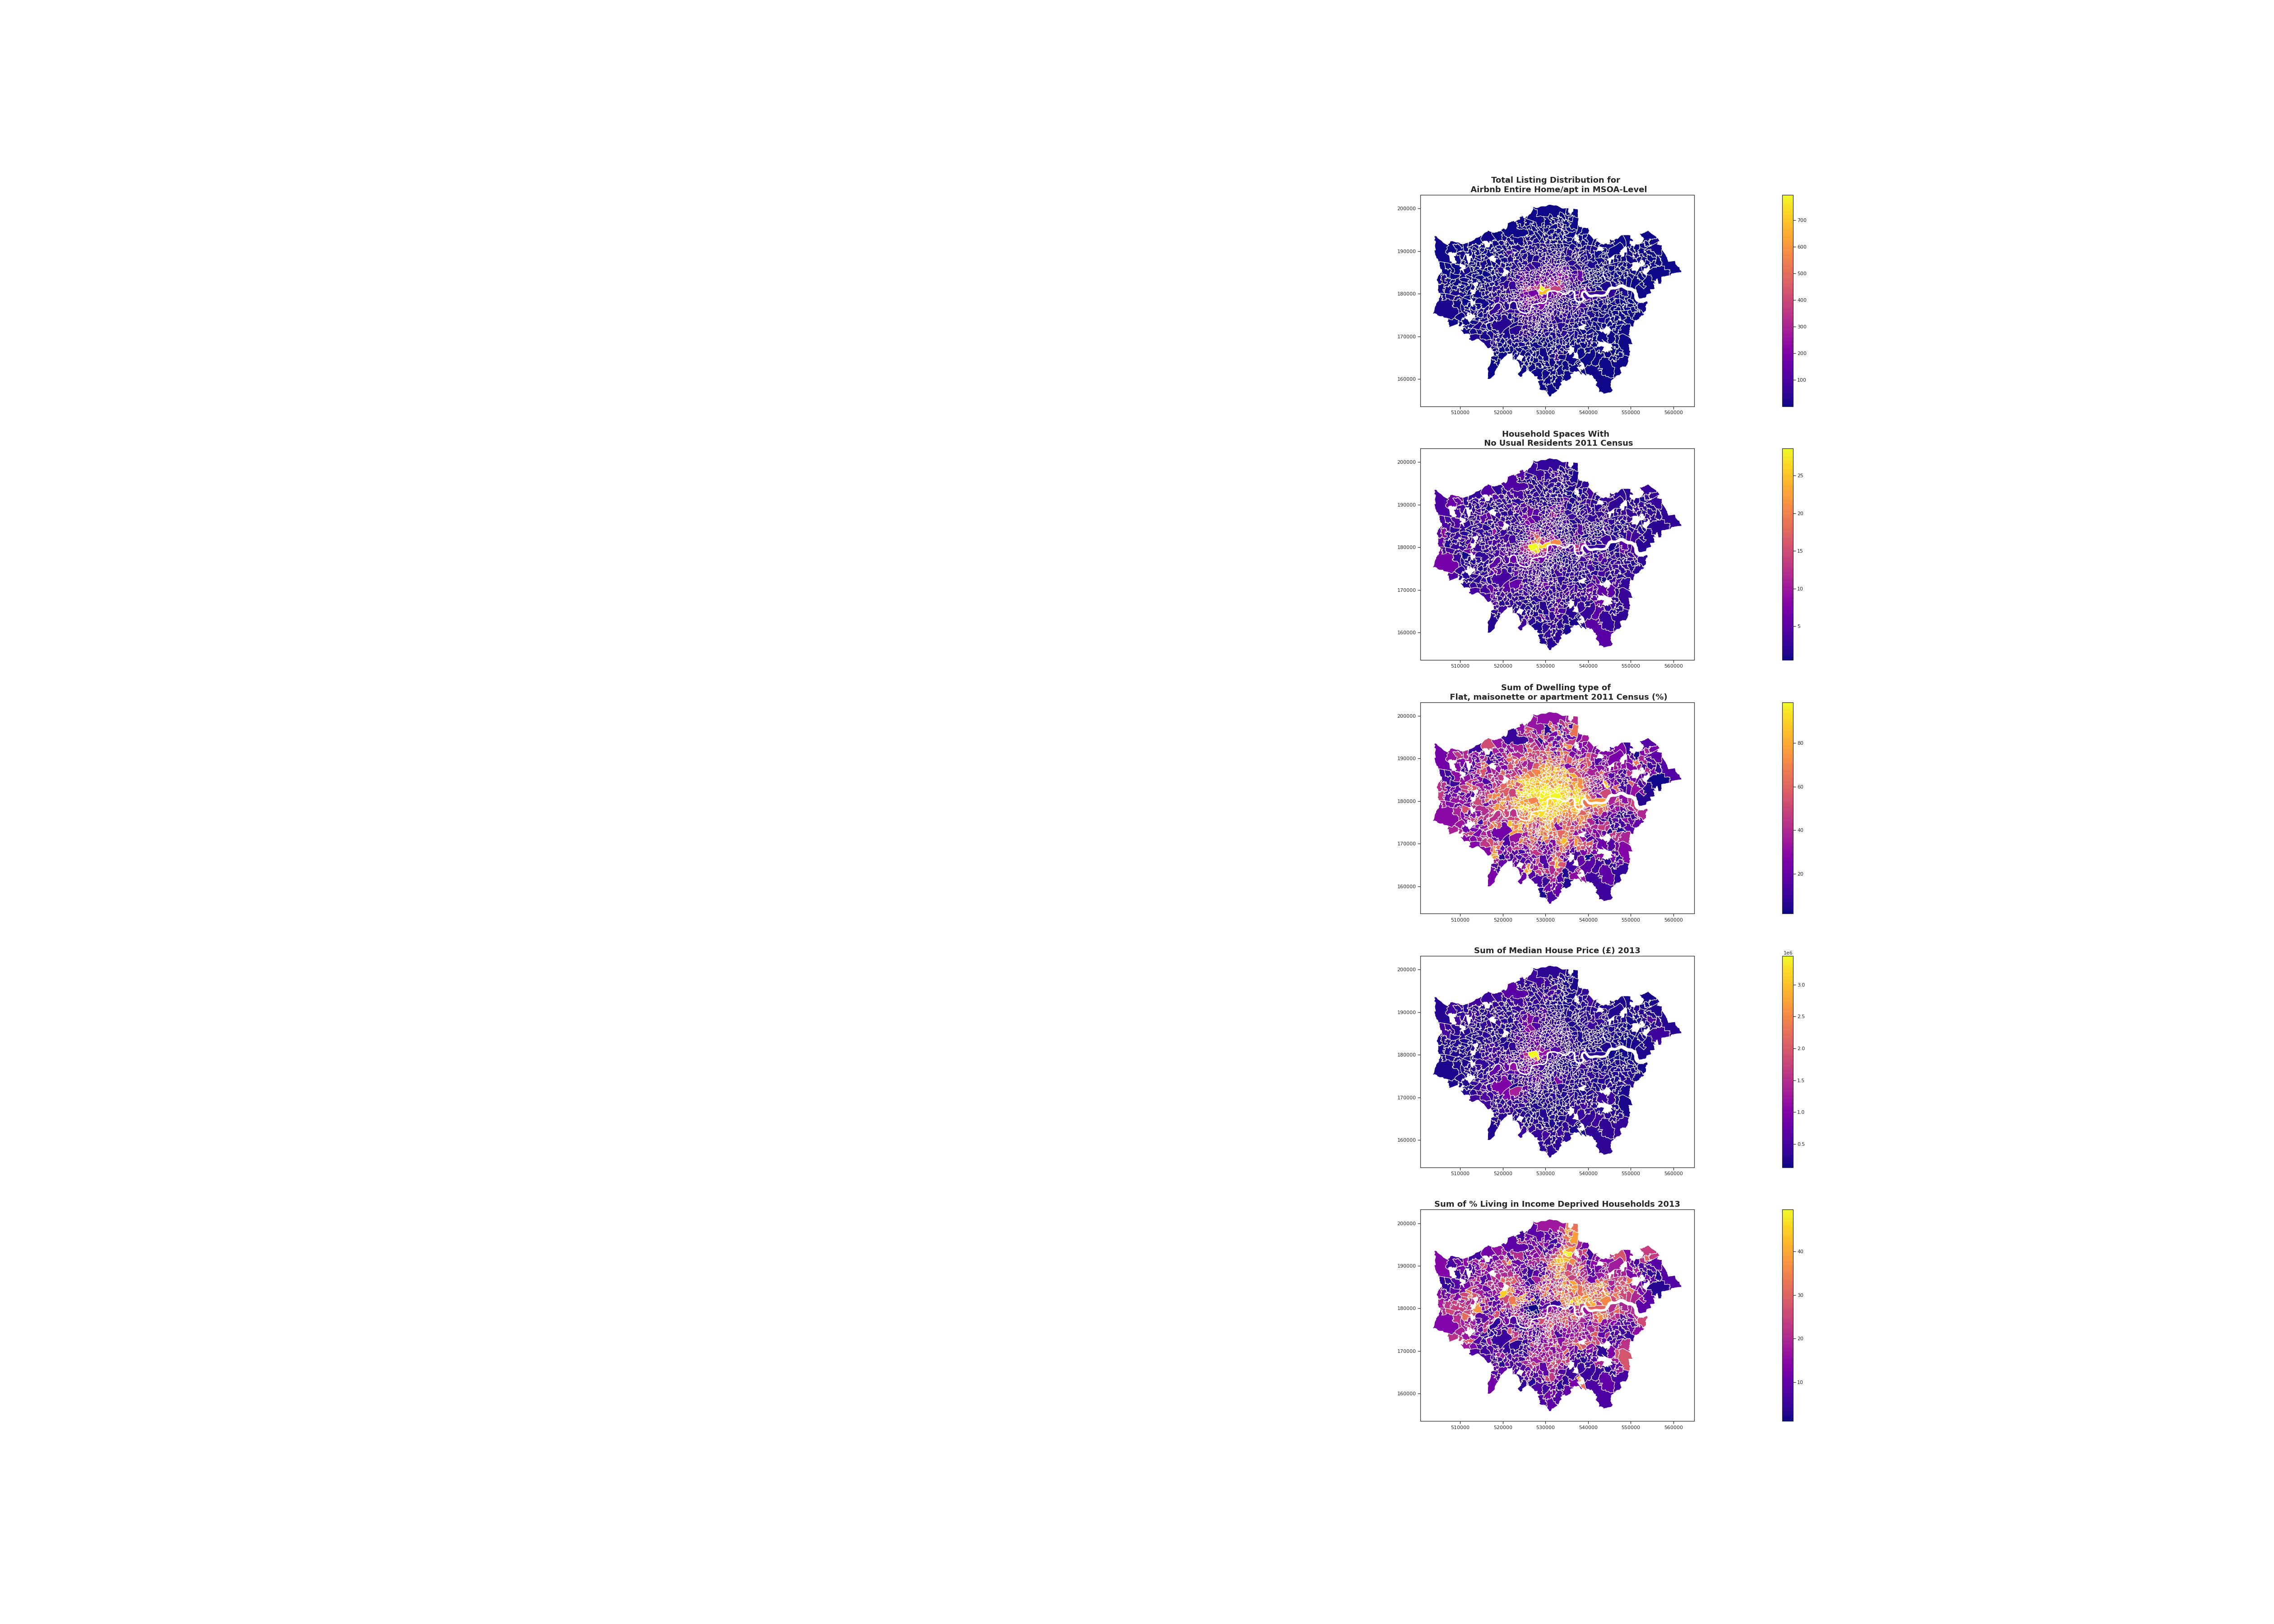

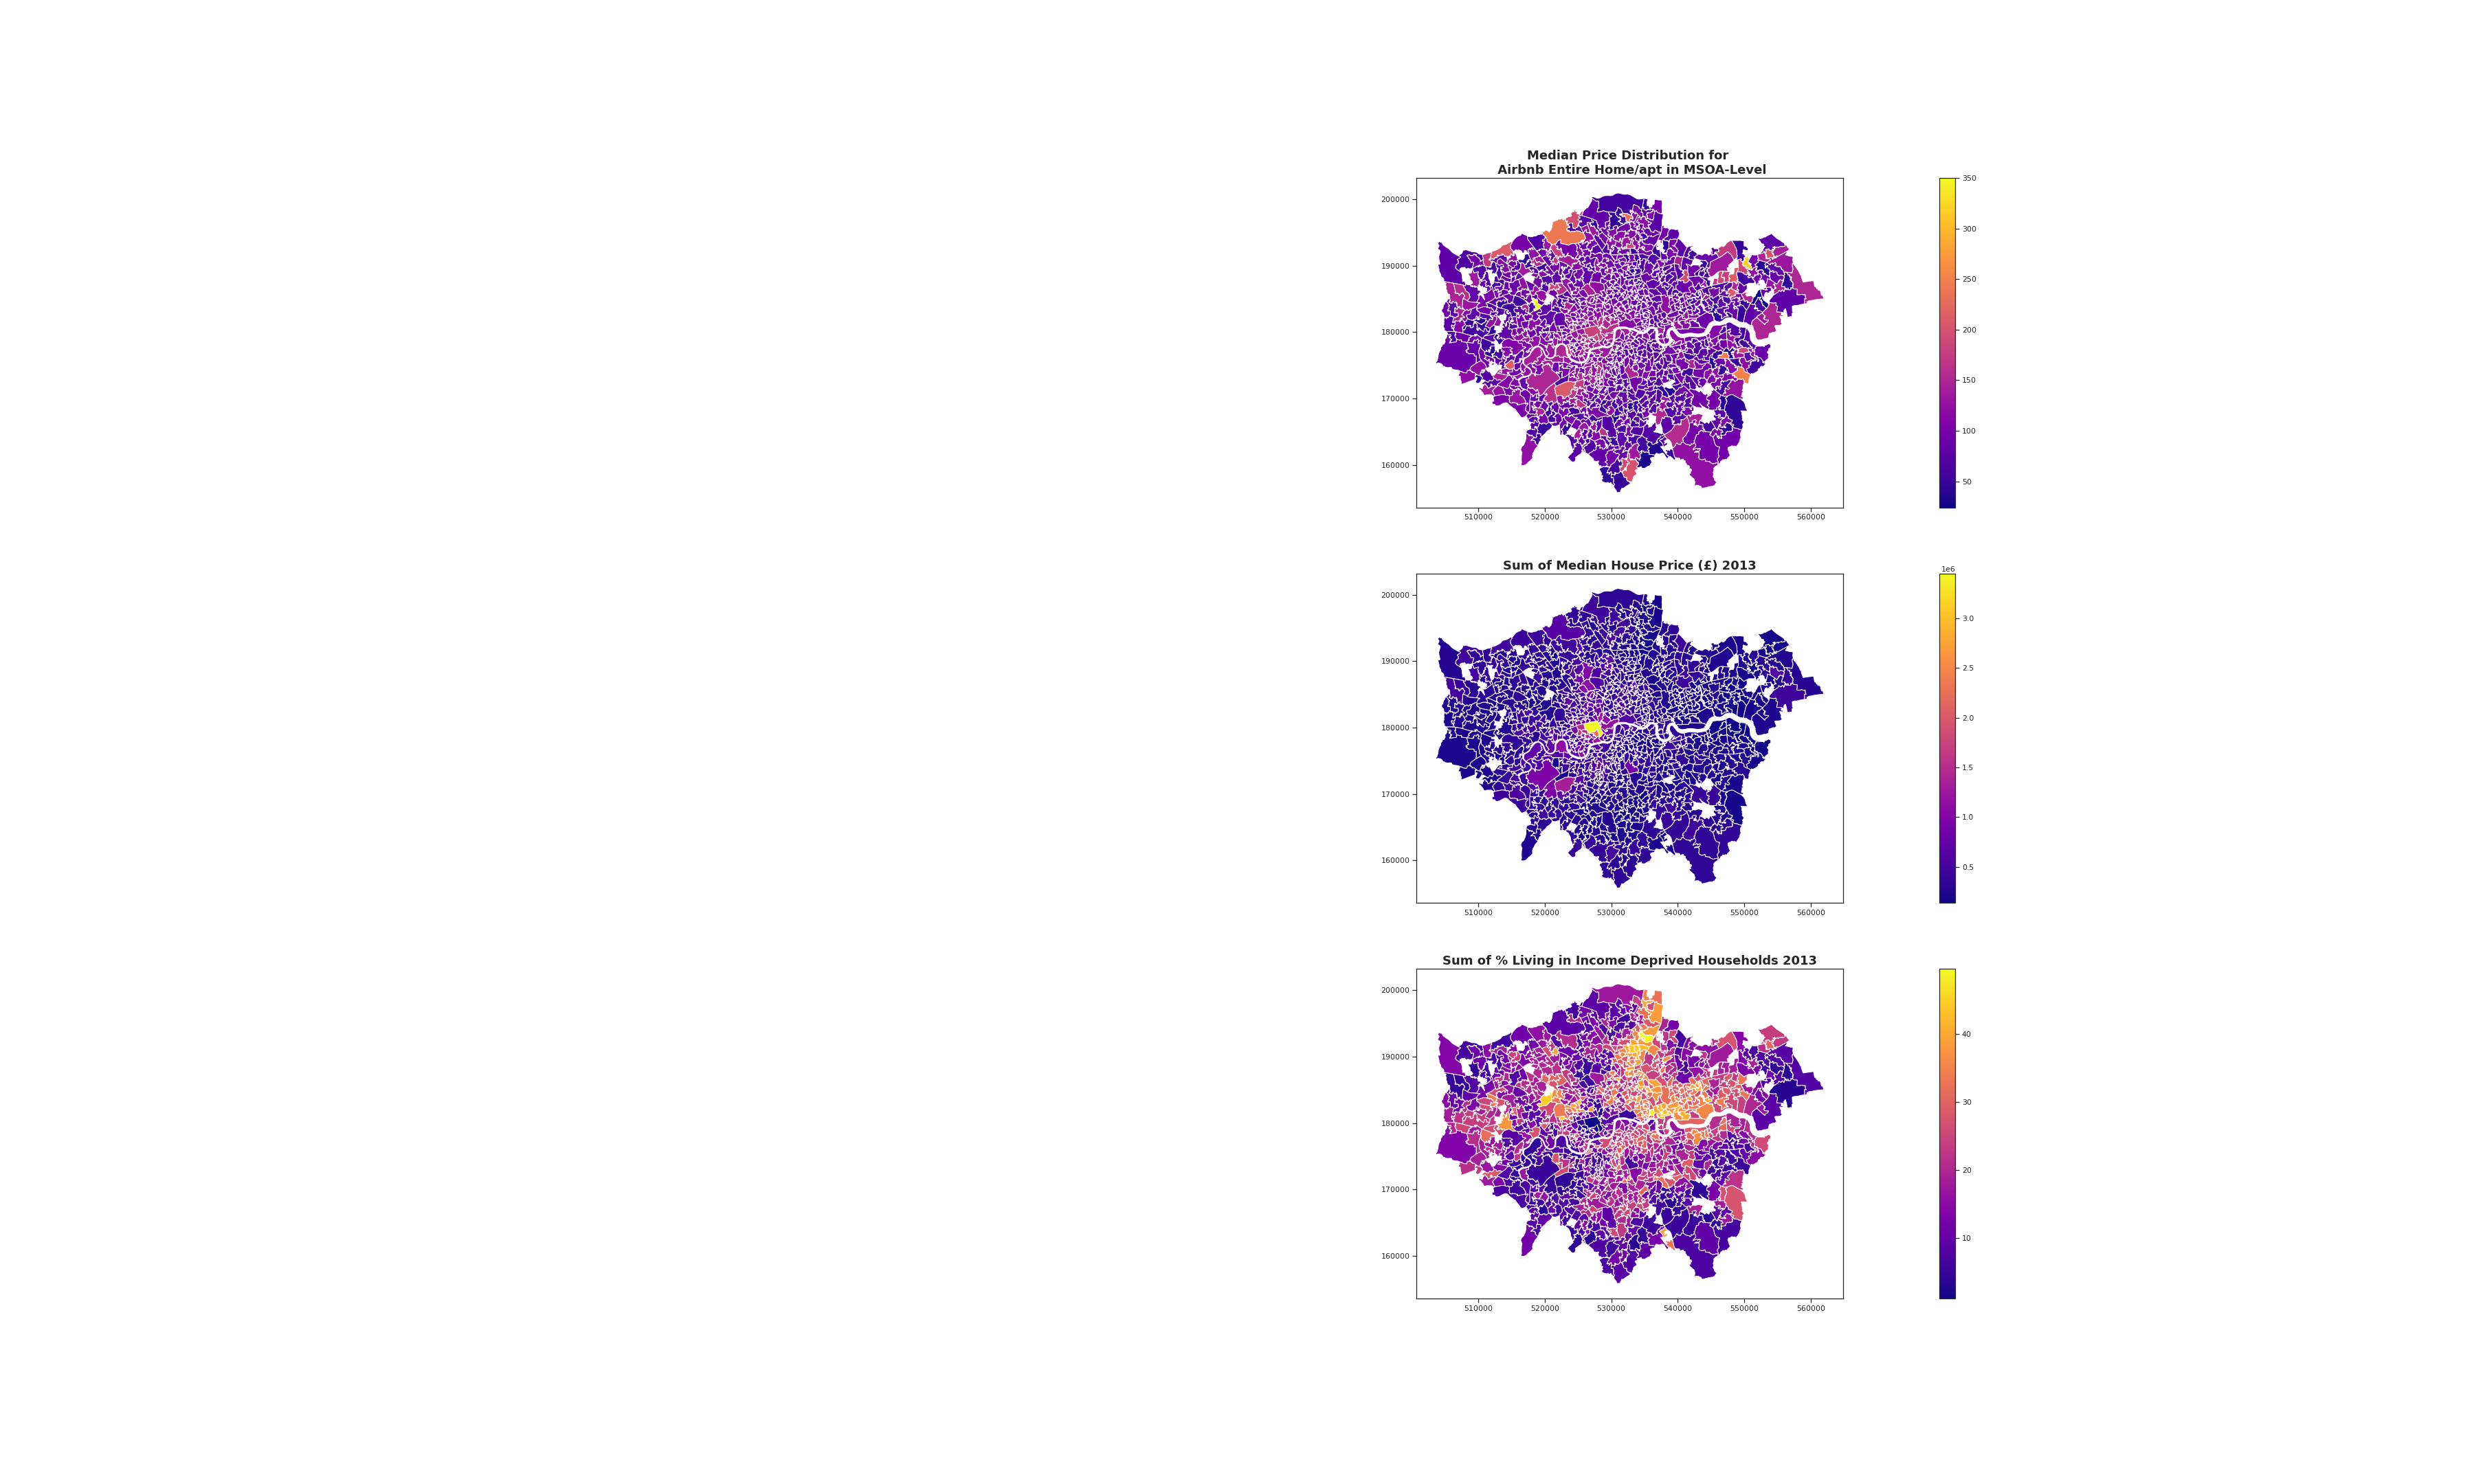

In conclusion, expanding Airbnb’s business have pros and cons. The good thing is to diversity a society’s potential streams of revenue such as tourism, promote local culture through festivals, holiday treats etc., which brings additional market for short-term rentals and boost economic activity, allowing free and positive competition among tourism related sectors such as retailers, CBDs. However, the down sides are proven to be higher costs for city residents especially for megacity like London where rental has been increased exponentially over the decade. The lack of regulation brings loss of national tax revenue and causes unemployment at traditional hotels where generally have higher property externalities cost such as cleaning, maintenance, greeting and thus are more vulnerable and sensitive to the crisis such as COVID-19. This report provides an exploratory basis on assessing Airbnb’s impact on local neighborhood from studying spatial distribution of dwelling types and household’s socio-economic characteristics. Further study can elaborate on spatial clustering and point patter analysis to analyze the neighborhoods that are more affected by Airbnb or count the number of listings for each LSOAs and choose a location of interest for spatial autocorrelation, geographically weighted regression, and multi-regression analysis. However, without accurate sources of data, the analysis results are less likely to be useful in policymaking. Debate on Airbnb is existing and thrilling, and I think whether and how Airbnb would overcome the post-pandemic economy depression is their priority for the coming year. 

## References:

[1]	Josh Bivens, ‘The economic costs and benefits of Airbnb: No reason for local policymakers to let Airbnb bypass tax or regulatory obligations’, Economic Policy Institute, Jan. 30, 2019. https://www.epi.org/publication/the-economic-costs-and-benefits-of-airbnb-no-reason-for-local-policymakers-to-let-airbnb-bypass-tax-or-regulatory-obligations/ (accessed Dec. 26, 2020).


[2]	K. Barron, E. Kung, and D. Proserpio, ‘The Effect of Home-Sharing on House Prices and Rents: Evidence from Airbnb’, Social Science Research Network, Rochester, NY, SSRN Scholarly Paper ID 3006832, Mar. 2020. doi: 10.2139/ssrn.3006832.


[3]	Z. Shabrina, E. Arcaute, and M. Batty, Airbnb’s disruption of the housing structure in London. 2019.


[4]	‘Inside Airbnb. Adding Data to the Debate.’ http://insideairbnb.com/ (accessed Jan. 13, 2021).
